In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"forecast1.csv",
parse_dates=['Дата'])
df = df.sort_values('Дата')
df

,Продажи,Дата
0,18.0,2023-01-08
1,30.0,2023-01-15
2,40.0,2023-01-22
3,36.0,2023-01-29
4,47.0,2023-02-05
...,...,...
99,584.0,2024-12-01
100,579.0,2024-12-08
101,605.0,2024-12-15
102,611.0,2024-12-22


In [2]:
for i in df.columns:
    print(i, df[i].isnull().sum())

Продажи 1
Дата 0


In [3]:
df[df.isna().any(axis=1)]

,Продажи,Дата
52,NaN,2024-01-07


In [4]:
df.iloc[40:60]

,Продажи,Дата
40,146.0,2023-10-15
41,158.0,2023-10-22
42,162.0,2023-10-29
43,164.0,2023-11-05
44,176.0,2023-11-12
45,166.0,2023-11-19
46,173.0,2023-11-26
47,165.0,2023-12-03
48,152.0,2023-12-10
49,157.0,2023-12-17


In [5]:
df.loc[52, "Продажи"] = (df.iloc[51]["Продажи"]+df.iloc[53]["Продажи"])/2

# # ВАРИАНТ 1: Удалить
# df = df.dropna()

# # ВАРИАНТ 2: Заполнить средним
# df['sales'].fillna(df['sales'].mean(), inplace=True)

# # ВАРИАНТ 3: Линейная интерполяция (для временных рядов)
# df['sales'].interpolate(method='linear', inplace=True)

In [6]:
# # Удалить выбросы (значения > 3 стандартных отклонений)
# mean = df['sales'].mean()
# std = df['sales'].std()
# df = df[(df['sales'] > mean - 3*std) & (df['sales'] < mean + 3*std)]

In [7]:
df.iloc[40:60]

,Продажи,Дата
40,146.0,2023-10-15
41,158.0,2023-10-22
42,162.0,2023-10-29
43,164.0,2023-11-05
44,176.0,2023-11-12
45,166.0,2023-11-19
46,173.0,2023-11-26
47,165.0,2023-12-03
48,152.0,2023-12-10
49,157.0,2023-12-17


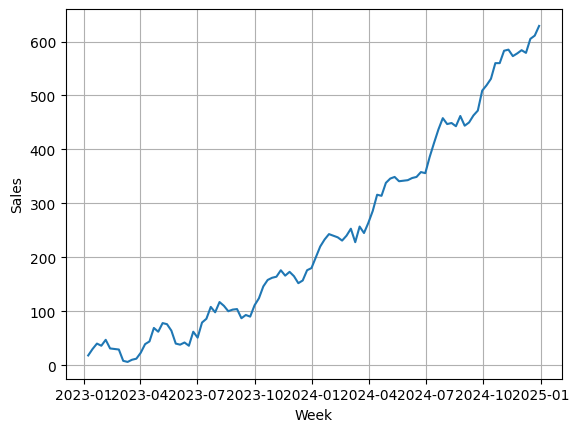

In [8]:
import matplotlib.pyplot as plt
# Построить график
plt.plot(df['Дата'], df['Продажи'])
plt.xlabel('Week')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [9]:
# t = df["Дата"].values
t = np.arange(len(df))
sales = df['Продажи'].values
t

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103])

In [10]:
# ============ ОБРАБОТКА ПРОПУСКОВ ============
# Удалить строки с NaN
# mask = ~np.isnan(sales)
# t = t[mask]
# sales = sales[mask]

In [11]:
def model(t, a1, a2, a3, a4):  # ВАЖНО: СНАЧАЛА t
    return a1 + a2*t + a3*(t**2) + a4 * np.sin(2*np.pi*t*(1/13))

In [12]:
from scipy.optimize import curve_fit
# ============ ПОДБОР ПАРАМЕТРОВ ============
# Начальное приближение (важно!)
initial_guess = [100, 1, 0.01, 10]

params, covariance = curve_fit(model, t, sales, initial_guess)
a1, a2, a3, a4 = params

print(f"Найденные параметры: a1={a1:.2f}, a2={a2:.2f}, a3={a3:.4f}, a4={a4:.2f}")


Найденные параметры: a1=16.70, a2=0.96, a3=0.0496, a4=23.08


In [13]:
# ============ ПРОГНОЗИРОВАНИЕ ============
# Следующие 12 недель (104-115)
future_weeks = np.arange(104, 116)
predictions = model(future_weeks, a1, a2, a3, a4)

# ============ ВЫВОД ОТВЕТА ============
answer = [f"{pred:.2f}" for pred in predictions]
print(", ".join(answer))

653.08, 675.14, 694.83, 710.27, 720.57, 726.02, 728.06, 728.94, 731.18, 737.03, 747.92, 764.16


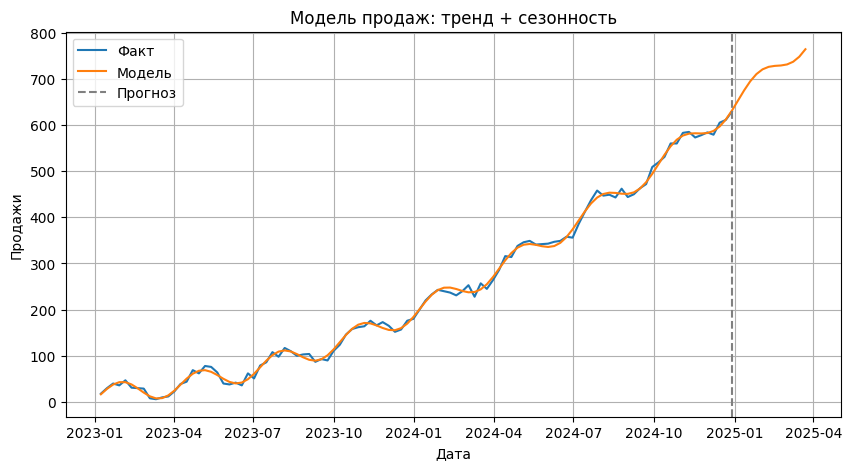

In [14]:
# Прогноз на 12 недель вперёд
t_future = np.arange(len(t) + 12)
y_pred = model(t_future, *params)

# График
plt.figure(figsize=(10, 5))
plt.plot(df['Дата'], sales, label="Факт")
plt.plot(pd.date_range(df['Дата'].iloc[0], periods=len(t_future), freq='W'), y_pred, label="Модель")
plt.axvline(df['Дата'].iloc[-1], color='gray', linestyle='--', label="Прогноз")
plt.legend()
plt.title("Модель продаж: тренд + сезонность")
plt.xlabel("Дата")
plt.ylabel("Продажи")
plt.grid()
plt.show()

In [15]:
import numpy as np

true = np.array([653.07, 675.12, 694.82, 710.26, 720.55, 726.0, 728.04, 728.92, 731.16, 737.01, 747.9, 764.13])
# pred = np.array([653.08, 675.14, 694.83, 710.27, 720.57, 726.02, 728.06, 728.94, 731.18, 737.03, 747.92, 764.16])
pred = np.array([float(f"{pred:.2f}") for pred in predictions])

diff = true - pred
norm = np.linalg.norm(diff)
score = round(max(20 - norm / 6, 0))

norm, score


(np.float64(0.06633249580711623), 20)

In [16]:
from sklearn.linear_model import LinearRegression
# import numpy as np
# import pandas as pd

# ============ ЗАГРУЗКА ДАННЫХ ============
# df = pd.read_csv('forecast1.csv')

# # ============ ОБРАБОТКА ПРОПУСКОВ ============
# df = df.dropna()  # Удалить строки с пропусками

# # ============ ФОРМИРОВАНИЕ ПРИЗНАКОВ ============
# t = df['week'].values
# sales = df['sales'].values

# Создать матрицу признаков [t, t², sin(...)]
X = np.column_stack([
    t,
    t**2,
    np.sin(2*np.pi*(1/13)*t)
])

# ============ ОБУЧЕНИЕ МОДЕЛИ ============
model = LinearRegression()
model.fit(X, sales)

# Параметры
a2, a3, a4 = model.coef_
a1 = model.intercept_

print(f"Параметры: a1={a1:.2f}, a2={a2:.2f}, a3={a3:.4f}, a4={a4:.2f}")

# ============ ПРОГНОЗИРОВАНИЕ ============
future_weeks = np.arange(104, 116)
X_future = np.column_stack([
    future_weeks,
    future_weeks**2,
    np.sin(2*np.pi*(1/13)*future_weeks)
])

predictions = model.predict(X_future)

# ============ ВЫВОД ============
answer = [f"{pred:.2f}" for pred in predictions]
print(", ".join(answer))


true = np.array([653.07, 675.12, 694.82, 710.26, 720.55, 726.0, 728.04, 728.92, 731.16, 737.01, 747.9, 764.13])
pred = np.array([float(f"{pred:.2f}") for pred in predictions])

diff = true - pred
norm = np.linalg.norm(diff)
score = round(max(20 - norm / 6, 0))

norm, score

Параметры: a1=16.70, a2=0.96, a3=0.0496, a4=23.08
653.08, 675.14, 694.83, 710.27, 720.57, 726.02, 728.06, 728.94, 731.18, 737.03, 747.92, 764.16


(np.float64(0.06633249580711623), 20)

In [17]:
from scipy.optimize import minimize
import numpy as np

# ============ ОПРЕДЕЛЕНИЕ ОШИБКИ ============
def error_function(params, t, sales):
    a1, a2, a3, a4 = params
    model_values = a1 + a2*t + a3*t**2 + a4*np.sin(2*np.pi*(1/13)*t)
    
    # Квадратичная ошибка
    error = np.sum((sales - model_values)**2)
    
    # Или абсолютная ошибка
    # error = np.sum(np.abs(sales - model_values))
    
    return error

# ============ МИНИМИЗАЦИЯ ============
initial_guess = [150, 1, 0.01, 10]

result = minimize(
    error_function, 
    x0=initial_guess, 
    args=(t, sales),
    method='BFGS'  # Метод градиентного спуска
)

"""
**Методы оптимизации в minimize:**

| Метод | Когда использовать |
|-------|-------------------|
| `'BFGS'` | Универсальный, хорош для гладких функций |
| `'Nelder-Mead'` | Не требует градиентов, медленнее |
| `'Powell'` | Хорош для функций с шумом |
| `'L-BFGS-B'` | Если нужны ограничения на параметры |
"""

a1, a2, a3, a4 = result.x
print(f"Найденные параметры: {result.x}")
print(f"Минимальная ошибка: {result.fun}")

def model(t, a1, a2, a3, a4):
    return a1 + a2*t + a3*t**2 + a4*np.sin(2*np.pi*(1/13)*t)

future_weeks = np.arange(104, 116)
predictions = model(future_weeks, a1, a2, a3, a4)

# ============ ВЫВОД ОТВЕТА ============
answer = [f"{pred:.2f}" for pred in predictions]
print(", ".join(answer))

true = np.array([653.07, 675.12, 694.82, 710.26, 720.55, 726.0, 728.04, 728.92, 731.16, 737.01, 747.9, 764.13])
pred = np.array([float(f"{pred:.2f}") for pred in predictions])

diff = true - pred
norm = np.linalg.norm(diff)
score = round(max(20 - norm / 6, 0))

norm, score

Найденные параметры: [16.70251619  0.95971862  0.04960896 23.07538871]
Минимальная ошибка: 5158.162443578885
653.08, 675.14, 694.83, 710.27, 720.57, 726.02, 728.06, 728.94, 731.18, 737.03, 747.92, 764.16


(np.float64(0.06633249580711623), 20)

In [18]:
# import numpy as np

# # Диапазон параметров
# a_values = np.linspace(1.3, 1.7, 400)
# best_error = float('inf')
# best_a = None

# for a in a_values:
#     error = sum((y_i - a * x_i)**2 for x_i, y_i in zip(t, sales))
#     if error < best_error:
#         best_error = error
#         best_a = a

# print(f"Лучший параметр: {best_a}")